## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=b, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    exp_tag = "BATCH_SIZE %s" % (str(b))
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[exp_tag] = {'train-loss': train_loss,
                        'valid-loss': valid_loss,
                        'train-accuracy': train_acc,
                        'valid-accuracy': valid_acc}


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

25000/25000 [==============================] - 324s 13ms/step - loss: 2.2247 - accuracy: 0.1747 - val_loss: 726.6434 - val_accuracy: 0.1524
Epoch 44/50
25000/25000 [==============================] - 292s 12ms/step - loss: 2.2300 - accuracy: 0.1700 - val_loss: 892.9304 - val_accuracy: 0.1873
Epoch 45/50
25000/25000 [==============================] - 299s 12ms/step - loss: 2.2302 - accuracy: 0.1675 - val_loss: 790.4092 - val_accuracy: 0.1927
Epoch 46/50
25000/25000 [==============================] - 306s 12ms/step - loss: 2.2313 - accuracy: 0.1647 - val_loss: 1787.7513 - val_accuracy: 0.1974
Epoch 47/50
25000/25000 [==============================] - 289s 12ms/step - loss: 2.2306 - accuracy: 0.1690 - val_loss: 765.8912 - val_accuracy: 0.1849
Epoch 48/50
25000/25000 [==============================] - 297s 12ms/step - loss: 2.2269 - accuracy: 0.1732 - val_loss: 1149.0016 - val_accuracy: 0.1818
Epoch 49/50
25000/25000 [==============================] - 287s 11ms/step - loss: 2.2268 - accurac

3125/3125 [==============================] - 40s 13ms/step - loss: 1.1463 - accuracy: 0.5942 - val_loss: 1.4507 - val_accuracy: 0.5128
Epoch 39/50
3125/3125 [==============================] - 40s 13ms/step - loss: 1.1539 - accuracy: 0.5912 - val_loss: 1.3622 - val_accuracy: 0.5246
Epoch 40/50
3125/3125 [==============================] - 40s 13ms/step - loss: 1.1435 - accuracy: 0.5972 - val_loss: 1.4399 - val_accuracy: 0.5116
Epoch 41/50
3125/3125 [==============================] - 40s 13ms/step - loss: 1.1322 - accuracy: 0.5969 - val_loss: 1.3676 - val_accuracy: 0.5321
Epoch 42/50
3125/3125 [==============================] - 40s 13ms/step - loss: 1.1269 - accuracy: 0.6032 - val_loss: 1.4039 - val_accuracy: 0.5215
Epoch 43/50
3125/3125 [==============================] - 40s 13ms/step - loss: 1.1226 - accuracy: 0.6034 - val_loss: 1.3591 - val_accuracy: 0.5322
Epoch 44/50
3125/3125 [==============================] - 40s 13ms/step - loss: 1.1105 - accuracy: 0.6061 - val_loss: 1.3687 - val_

1563/1563 [==============================] - 25s 16ms/step - loss: 0.9132 - accuracy: 0.6766 - val_loss: 1.4524 - val_accuracy: 0.5221
Epoch 35/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9056 - accuracy: 0.6779 - val_loss: 1.5788 - val_accuracy: 0.4912
Epoch 36/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9045 - accuracy: 0.6775 - val_loss: 1.4716 - val_accuracy: 0.5182
Epoch 37/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8940 - accuracy: 0.6796 - val_loss: 1.5444 - val_accuracy: 0.4998
Epoch 38/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8852 - accuracy: 0.6837 - val_loss: 1.6024 - val_accuracy: 0.4958
Epoch 39/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8765 - accuracy: 0.6883 - val_loss: 1.5349 - val_accuracy: 0.5073
Epoch 40/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8662 - accuracy: 0.6907 - val_loss: 1.6577 - val_

391/391 [==============================] - 10s 25ms/step - loss: 0.5330 - accuracy: 0.8164 - val_loss: 1.9650 - val_accuracy: 0.4581
Epoch 31/50
391/391 [==============================] - 10s 25ms/step - loss: 0.5128 - accuracy: 0.8206 - val_loss: 2.0514 - val_accuracy: 0.4444
Epoch 32/50
391/391 [==============================] - 10s 25ms/step - loss: 0.5040 - accuracy: 0.8240 - val_loss: 2.0735 - val_accuracy: 0.4437
Epoch 33/50
391/391 [==============================] - 10s 25ms/step - loss: 0.4802 - accuracy: 0.8335 - val_loss: 1.9991 - val_accuracy: 0.4706
Epoch 34/50
391/391 [==============================] - 10s 25ms/step - loss: 0.4531 - accuracy: 0.8425 - val_loss: 2.0719 - val_accuracy: 0.4685
Epoch 35/50
391/391 [==============================] - 10s 27ms/step - loss: 0.4417 - accuracy: 0.8466 - val_loss: 2.3209 - val_accuracy: 0.4370
Epoch 36/50
391/391 [==============================] - 10s 26ms/step - loss: 0.4217 - accuracy: 0.8550 - val_loss: 2.1719 - val_accuracy: 0.45

196/196 [==============================] - 7s 38ms/step - loss: 0.5549 - accuracy: 0.8189 - val_loss: 1.9006 - val_accuracy: 0.4610
Epoch 28/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5263 - accuracy: 0.8286 - val_loss: 1.9064 - val_accuracy: 0.4650
Epoch 29/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5034 - accuracy: 0.8355 - val_loss: 1.9566 - val_accuracy: 0.4551
Epoch 30/50
196/196 [==============================] - 8s 38ms/step - loss: 0.4794 - accuracy: 0.8462 - val_loss: 1.9534 - val_accuracy: 0.4702
Epoch 31/50
196/196 [==============================] - 7s 38ms/step - loss: 0.4557 - accuracy: 0.8543 - val_loss: 1.9752 - val_accuracy: 0.4626
Epoch 32/50
196/196 [==============================] - 7s 38ms/step - loss: 0.4363 - accuracy: 0.8595 - val_loss: 1.9584 - val_accuracy: 0.4605
Epoch 33/50
196/196 [==============================] - 7s 38ms/step - loss: 0.4121 - accuracy: 0.8698 - val_loss: 2.0152 - val_accuracy: 0.4695
Epoc

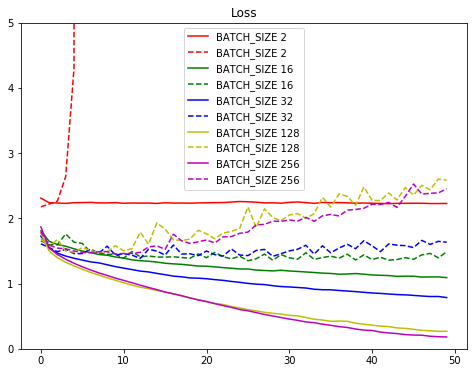

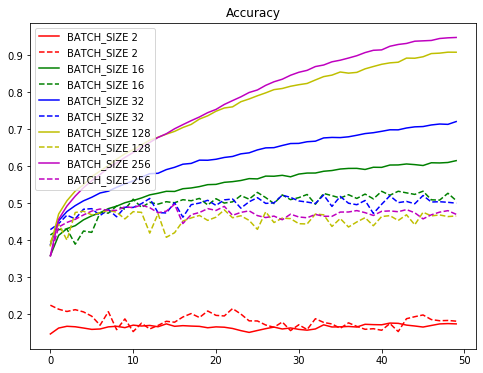

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

BN 放在 Activation 之前，並比較訓練結果

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
results = {}
BATCH_SIZE = [128]
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=b, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    exp_tag = "BATCH_SIZE %s" % (str(b))
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[exp_tag] = {'train-loss': train_loss,
                        'valid-loss': valid_loss,
                        'train-accuracy': train_acc,
                        'valid-accuracy': valid_acc}


Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)              

391/391 [==============================] - 10s 26ms/step - loss: 0.2686 - accuracy: 0.9112 - val_loss: 2.4484 - val_accuracy: 0.4649
Epoch 49/50
391/391 [==============================] - 10s 26ms/step - loss: 0.2660 - accuracy: 0.9117 - val_loss: 2.4009 - val_accuracy: 0.4614
Epoch 50/50
391/391 [==============================] - 10s 25ms/step - loss: 0.2555 - accuracy: 0.9161 - val_loss: 2.3459 - val_accuracy: 0.4832


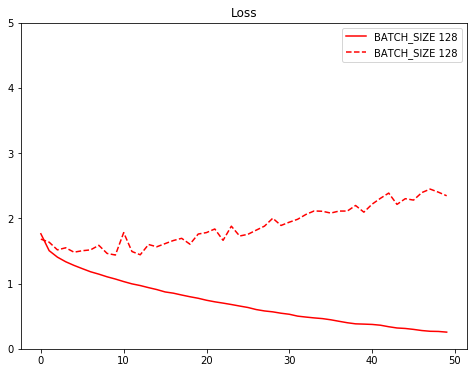

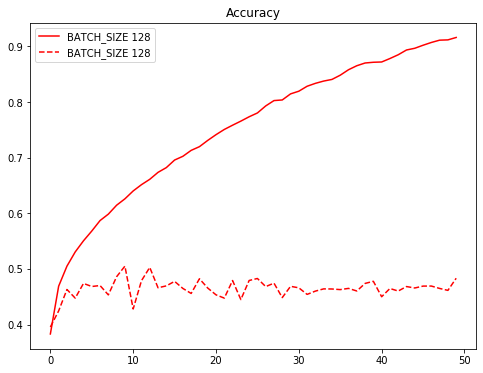

In [12]:
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

BN 放在 Input Layer 後

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    input_layer = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=b, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    exp_tag = "BATCH_SIZE %s" % (str(b))
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[exp_tag] = {'train-loss': train_loss,
                        'valid-loss': valid_loss,
                        'train-accuracy': train_acc,
                        'valid-accuracy': valid_acc}


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: batch_normalization_19/batchnorm/add_1:0


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_8:0", shape=(None, 3072), dtype=float32) at layer "batch_normalization_19". The following previous layers were accessed without issue: []

In [ ]:
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()